In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf

[*********************100%***********************]  1 of 1 completed


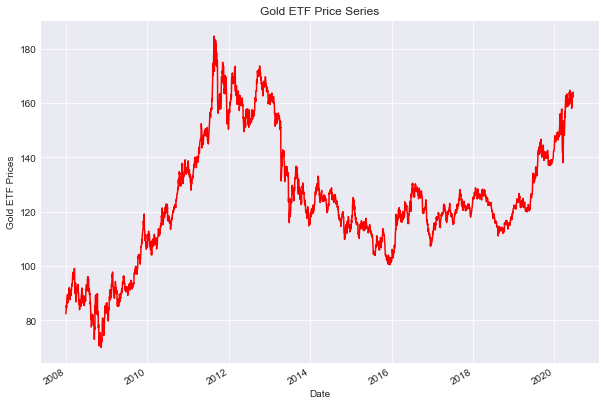

In [3]:
# Read data
Df = yf.download('GLD', '2008-01-01', '2020-6-22', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [30]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

In [31]:
# Split the data into train and test dataset
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [32]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.21 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.42 (constant)


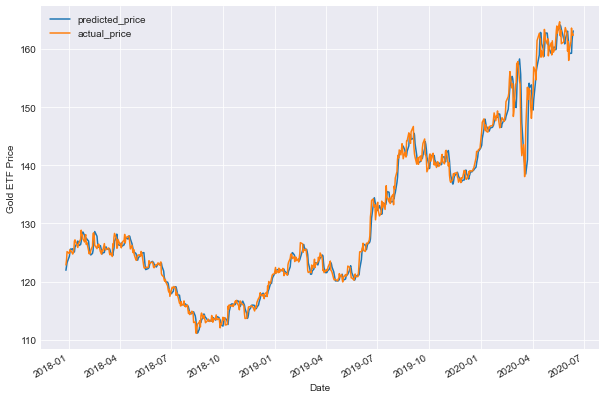

In [33]:
# Predicting the Gold ETF prices
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [34]:
# R square
r2_score = linear.score(X[t:], y[t:])*100
float("{0:.2f}".format(r2_score))

98.82

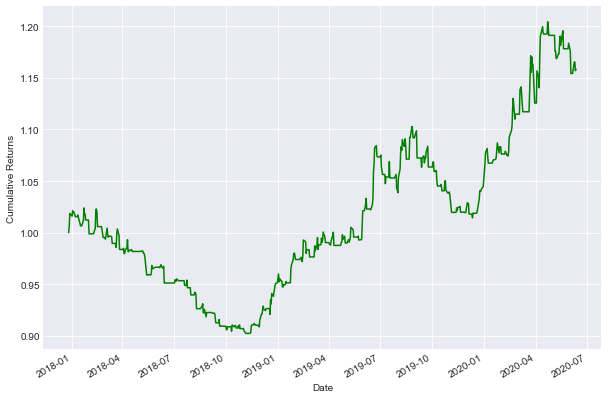

,price,predicted_price_next_day,actual_price_next_day,gold_returns,signal,strategy_returns
Date,,,,,,
2017-12-27,122.230003,121.939976,122.849998,0.005072,0,0.000000
2017-12-28,122.849998,122.616743,123.650002,0.006512,1,0.006512
2017-12-29,123.650002,123.268629,125.150002,0.012131,1,0.012131
2018-01-02,125.150002,124.316623,124.820000,-0.002637,1,-0.002637
2018-01-03,124.820000,124.992349,125.459999,0.005127,1,0.005127
...,...,...,...,...,...,...
2020-06-08,159.720001,159.246251,161.259995,0.009642,1,0.009642
2020-06-09,161.259995,159.236341,163.570007,0.014325,0,0.000000
2020-06-10,163.570007,161.429268,162.389999,-0.007214,1,-0.007214


In [45]:
gold = pd.DataFrame()

gold['price'] = Df[t:]['Close']
gold['predicted_price_next_day'] = predicted_price
gold['actual_price_next_day'] = y_test
gold['gold_returns'] = gold['price'].pct_change().shift(-1)

gold['signal'] = np.where(gold.predicted_price_next_day.shift(1) < gold.predicted_price_next_day,1,0)

gold['strategy_returns'] = gold.signal * gold['gold_returns']
((gold['strategy_returns']+1).cumprod()).plot(figsize=(10,7),color='g')
plt.ylabel('Cumulative Returns')
plt.show()

gold

In [36]:
# Calculate sharpe ratio
sharpe = gold['strategy_returns'].mean()/gold['strategy_returns'].std()*(252**0.5)
'Sharpe Ratio %.2f' % (sharpe)

'Sharpe Ratio 0.67'

In [50]:
# import datetime and get today's date
import datetime as dt
current_date = dt.datetime.now()

# Get the data
data = yf.download('GLD', '2008-06-01','2021-07-18', auto_adjust=True)
data['S_3'] = data['Close'].rolling(window=3).mean()
data['S_9'] = data['Close'].rolling(window=9).mean()
data = data.dropna()

# Forecast the price
data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
data['actual_gold_price'] = data['Close']
data['signal'] = np.where(data.predicted_gold_price.shift(1) < data.predicted_gold_price,"Buy","No Position")

# Print the forecast
data.tail(1)[['signal','predicted_gold_price','actual_gold_price']].T


[*********************100%***********************]  1 of 1 completed


<ipython-input-50-f80824363c85>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predicted_gold_price'] = linear.predict(data[['S_3', 'S_9']])
<ipython-input-50-f80824363c85>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['actual_gold_price'] = data['Close']
<ipython-input-50-f80824363c85>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

Date,2021-07-16
signal,Buy
predicted_gold_price,170.600524
actual_gold_price,169.410004


In [40]:
data.predicted_gold_price

Date
2008-06-12     85.990613
2008-06-13     86.152866
2008-06-16     86.145816
2008-06-17     86.795405
2008-06-18     87.738056
                 ...    
2021-07-12    169.117773
2021-07-13    169.244688
2021-07-14    169.854549
2021-07-15    170.573525
2021-07-16    170.600524
Name: predicted_gold_price, Length: 3297, dtype: float64

In [41]:
data.predicted_gold_price.shift(1)

Date
2008-06-12           NaN
2008-06-13     85.990613
2008-06-16     86.152866
2008-06-17     86.145816
2008-06-18     86.795405
                 ...    
2021-07-12    169.077657
2021-07-13    169.117773
2021-07-14    169.244688
2021-07-15    169.854549
2021-07-16    170.573525
Name: predicted_gold_price, Length: 3297, dtype: float64